<a href="https://colab.research.google.com/github/elzemaltun/DMML-Weather-Prediction/blob/main/WeatherPredictionInCesena_MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEATHER PREDICTION MODEL

It is supervised learning task since the data is labeled. Multivariate regression problem because we need to predict a value (temperature) from multiple features. Plain batch learning can be applied since there is no continuous data flow is coming.

Use either RMSE or MAE. RMSE works better with rare outliers case.

in **random forest**, you also should do hyperparameter optimization -which combination of the forests gives the best result.

**Support Vector Regression** predicts continuous values by fitting a function within a defined error margin. It uses kernel functions to handle both linear relationships and complex non-linear patterns in data.

**The MLPRegressor** (Multi-layer Perceptron Regressor) is an algorithm that implements a feedforward artificial neural network. It's a type of deep learning model designed for regression tasks. It consists of multiple layers of nodes (neurons), where each node is a perceptron that takes inputs, applies an activation function, and passes the output to the next layer. The 'multi-layer' aspect means it has at least one hidden layer between the input and output layers.Unlike perceptron model, it is not only for the binary classification, since it has multiple hayers, it can do multiclass classification or regression.

**Logistic regression:** despite its name, it is a classification model.
Linear Regression: This is a statistical model that assumes a linear relationship between input features and the output. It's a very simple model and not a neural network.
**Random Forest Regressor: **This is an ensemble learning method that builds multiple decision trees during training and outputs the mean prediction of the individual trees. Decision trees are not neural networks; they are rule-based models.

**Support Vector Regressor (SVR):** This is a type of Support Vector Machine adapted for regression. It works by finding a hyperplane that best fits the data points while minimizing the errors, but it does not use a neural network architecture with layers and activation functions like an MLP.

HYPERPARAMETER OPTIMIZATION: either do e grid search or random search or bayesian optimization.


In this project, the label (Y) is **temperature**!!


unrelated to this, you can check the feature importance too after the modelling? idk, lecture notes 6, pg26.

you can show a dimentionality reduction with either PCA or TSNE.

also I suggest, turn this also into a classification problem just to show off, like hot, warm, cold.

In [ ]:
yiu can check feature importance too.

## Data Understanding

In [ ]:
import pandas as pd
df = pd.read_csv('/content/open-meteo-cesena.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/open-meteo-cesena.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             5844 non-null   object 
 1   temperature_2m (Â°C)             5844 non-null   float64
 2   precipitation (mm)               5844 non-null   float64
 3   surface_pressure (hPa)           5844 non-null   float64
 4   pressure_msl (hPa)               5844 non-null   float64
 5   wind_speed_10m (km/h)            5844 non-null   float64
 6   soil_temperature_0_to_7cm (Â°C)  5844 non-null   float64
 7   relative_humidity_2m (%)         5844 non-null   int64  
 8   dew_point_2m (Â°C)               5844 non-null   float64
 9   apparent_temperature (Â°C)       5844 non-null   float64
 10  wind_direction_10m (Â°)          5844 non-null   int64  
 11  wind_gusts_10m (km/h)            5844 non-null   float64
 12  cloud_cover (%)     

In [ ]:
df.describe(include='all')

,time,temperature_2m (Â°C),precipitation (mm),surface_pressure (hPa),pressure_msl (hPa),wind_speed_10m (km/h),soil_temperature_0_to_7cm (Â°C),relative_humidity_2m (%),dew_point_2m (Â°C),apparent_temperature (Â°C),wind_direction_10m (Â°),wind_gusts_10m (km/h),cloud_cover (%)
count,5844,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
unique,5844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-12-31T18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.080459,0.599829,1010.563347,1016.211636,8.178730,15.998392,74.864990,9.977105,14.240931,194.911533,17.917813,51.745038
std,NaN,8.541100,2.152007,7.745206,7.838003,4.752098,8.504083,18.756702,6.232682,10.116447,93.926903,9.532087,42.813731
min,NaN,-4.700000,0.000000,980.000000,985.500000,0.000000,-0.100000,17.000000,-10.900000,-7.900000,1.000000,1.100000,0.000000
25%,NaN,8.100000,0.000000,1006.100000,1011.600000,5.100000,8.800000,61.000000,5.400000,6.000000,107.000000,11.200000,4.000000
50%,NaN,14.600000,0.000000,1010.400000,1015.900000,7.200000,15.400000,78.000000,10.200000,13.600000,219.000000,15.800000,50.000000
75%,NaN,21.400000,0.100000,1015.025000,1020.700000,10.200000,22.500000,92.000000,15.100000,22.300000,270.000000,22.700000,100.000000


In [ ]:
# convert time object to date time data type
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year # add year column for visualization
df

,time,temperature_2m (Â°C),precipitation (mm),surface_pressure (hPa),pressure_msl (hPa),wind_speed_10m (km/h),soil_temperature_0_to_7cm (Â°C),relative_humidity_2m (%),dew_point_2m (Â°C),apparent_temperature (Â°C),wind_direction_10m (Â°),wind_gusts_10m (km/h),cloud_cover (%),year
0,2022-01-01 00:00:00,2.0,0.0,1019.7,1025.7,5.2,4.0,100,2.0,-0.6,282,9.4,100,2022
1,2022-01-01 06:00:00,1.5,0.0,1019.6,1025.6,3.4,3.3,100,1.5,-0.9,238,8.6,100,2022
2,2022-01-01 12:00:00,6.9,0.0,1021.5,1027.4,3.6,5.8,75,2.8,4.8,360,14.4,100,2022
3,2022-01-01 18:00:00,3.2,0.0,1020.5,1026.4,3.1,5.2,100,3.2,1.1,225,9.0,100,2022
4,2022-01-02 00:00:00,3.5,0.0,1022.0,1027.9,2.4,4.2,85,1.3,1.3,243,9.7,100,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,2025-12-30 18:00:00,3.3,0.0,1011.1,1017.0,7.5,3.9,91,2.0,0.5,281,19.4,100,2025
5840,2025-12-31 00:00:00,4.4,0.3,1013.1,1019.0,5.5,4.0,93,3.4,2.1,163,8.3,100,2025
5841,2025-12-31 06:00:00,1.3,0.0,1014.2,1020.1,6.9,2.2,89,-0.3,-1.9,135,17.6,30,2025
5842,2025-12-31 12:00:00,7.0,0.0,1015.0,1020.8,6.7,5.0,54,-1.8,3.6,87,16.2,38,2025


**NEEDED STUFF:**
1. Visualization of the data
    - maybe group hours to days or better, group the days to months, seasons, years

2. Check the relationship with the variables, correlation matrix

3. maybe change the data type to float32? but why? also no missing data, mention that.

4. You can use pareto, combine stuff like temperature, season, wind speed or temperature, season, humidity; wind, wind direction, temperature; cloud cover, temperature, season etc.

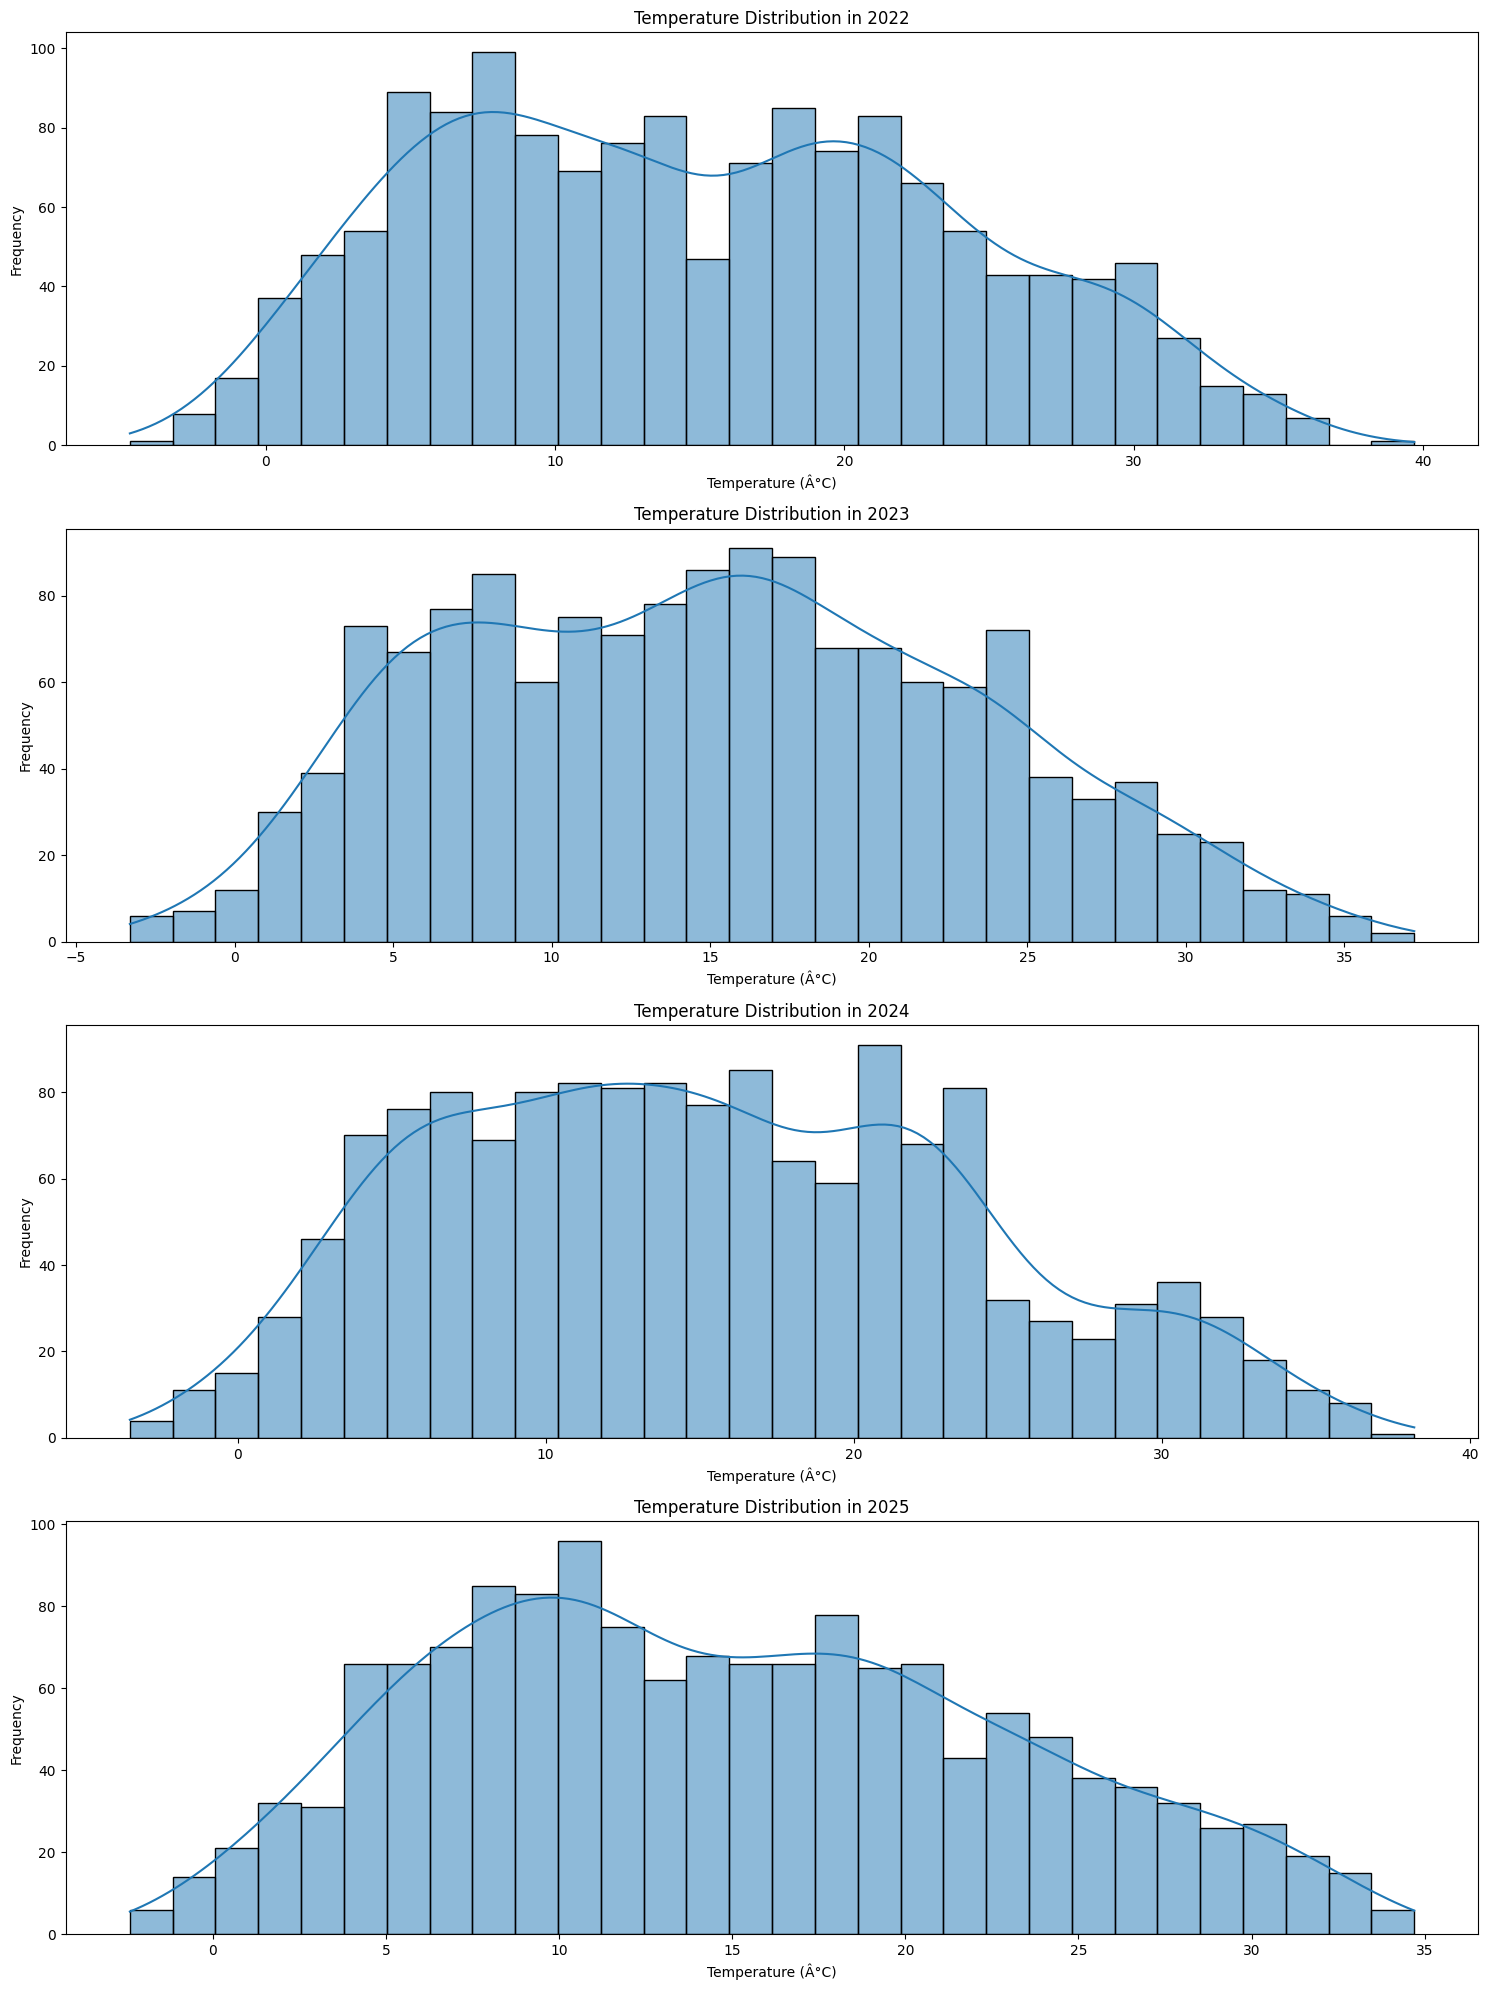

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique years for iteration
years = df['year'].unique().tolist()
years.sort()

plt.figure(figsize=(15, 5 * len(years)))

for i, year in enumerate(years):
    plt.subplot(len(years), 1, i + 1)
    sns.histplot(df[df['year'] == year]['temperature_2m (Â°C)'], kde=True, bins=30)
    plt.title(f'Temperature Distribution in {year}')
    plt.xlabel('Temperature (Â°C)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['month'] = df['time'].dt.month
df_monthly_avg = df.groupby(['year', 'month'])['temperature_2m (Â°C)'].mean().reset_index()
display(df_monthly_avg.head())

,year,month,temperature_2m (Â°C)
0,2022,1,3.598387
1,2022,2,6.880357
2,2022,3,7.104839
3,2022,4,11.798333
4,2022,5,19.641935


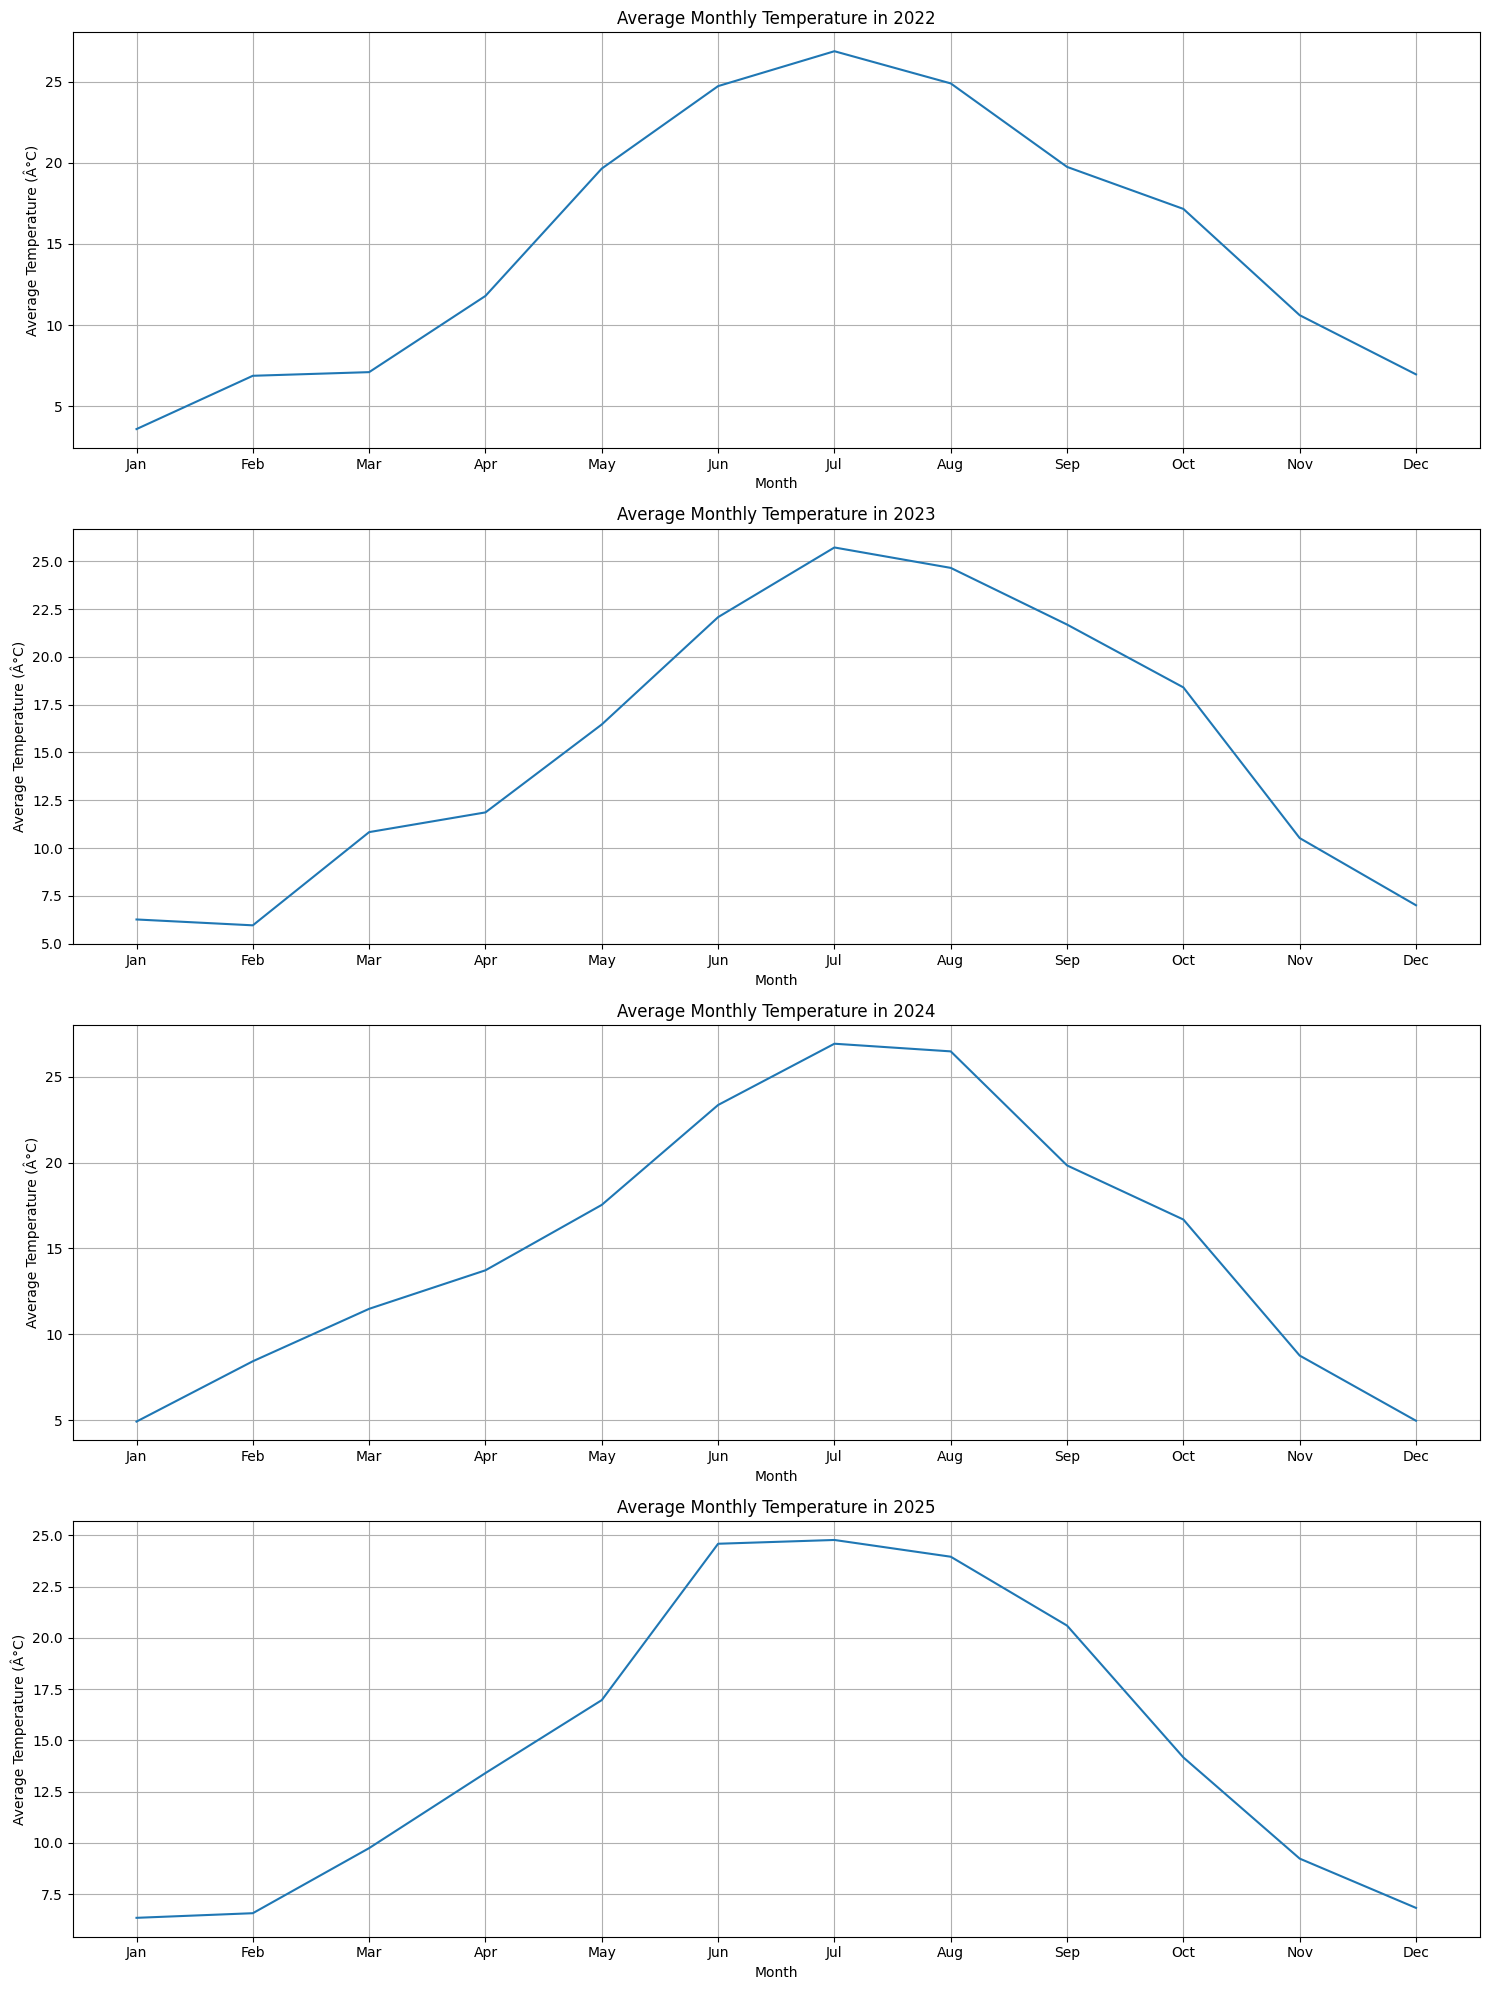

In [ ]:
plt.figure(figsize=(15, 5 * len(years)))

for i, year in enumerate(years):
    plt.subplot(len(years), 1, i + 1)
    sns.lineplot(data=df_monthly_avg[df_monthly_avg['year'] == year], x='month', y='temperature_2m (Â°C)')
    plt.title(f'Average Monthly Temperature in {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (Â°C)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)

plt.tight_layout()
plt.show()

From the above data, we can see that the average temperature for these three year is 15 degrees. In these three years, maximum temperature was 39.7, and min temperature was -4.7. BURAYA BIRAZ DAHA ZIRVALA

## DATA PREPARATION

1. Gather hourly data to day/night scala but this part I am not sure so in the worst case, consider data for 12 hours but this is not optimal, maybe check another dataset to combine it like the sunset sundown in the last three years.
Discretization: transforming continuous attributes into categorical ones - so maybe do this to day/night type of way, also maybe seasonal or monthly way (not sure if makes sense but another columns for the season maybe)

2. Feature engineering - correlation can be applied here, check also the variances, ask ai which one might be better: filter strategy, wrapper strategy, embedded strategy?

3. do I need normalization? check with ai.

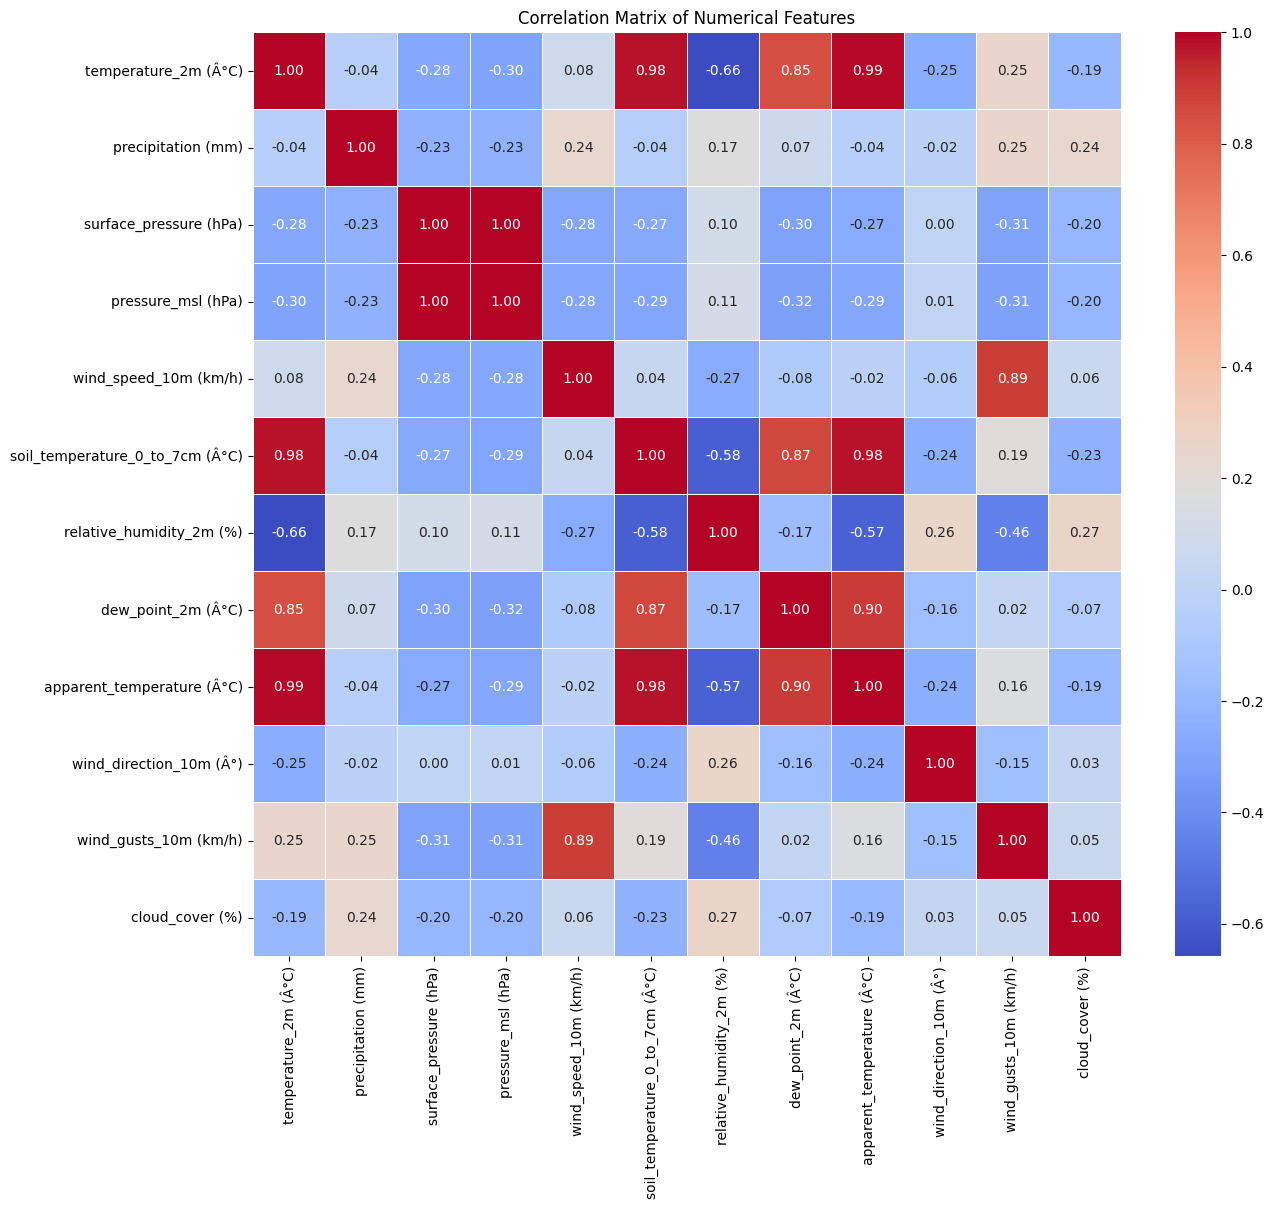

In [ ]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
